In [1]:
# importing modules
from math import sqrt
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
import statsmodels
import statsmodels.api as sm  
!pip install neuralprophet
from neuralprophet import NeuralProphet
import pickle
!pip install Scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 113 kB 5.3 MB/s 
     |████████████████████████████████| 419 kB 29.2 MB/s 
     |████████████████████████████████| 706 kB 35.9 MB/s 
     |████████████████████████████████| 232 kB 38.5 MB/s 
     |████████████████████████████████| 1.4 MB 41.0 MB/s 
     |████████████████████████████████| 51 kB 5.1 MB/s 
     |████████████████████████████████| 1.6 MB 39.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exploratory Analysis

In [2]:
# reading csv file
data = pd.read_csv("/content/MC_house_price_avg.csv")
print(data)

# count the rows and columns in a DataFrame
print("\nNumber of rows and column in our DataFrame = ",data.shape)



   RegionID  SizeRank         RegionName RegionType StateName State  \
0      2975        41  Montgomery County     county        MD    MD   

                                          Metro  StateCodeFIPS  \
0  Washington-Arlington-Alexandria, DC-VA-MD-WV             24   

   MunicipalCodeFIPS  1/31/2000  ...  11/30/2021  12/31/2021  1/31/2022  \
0                 31     225675  ...      564318      567150     567624   

   2/28/2022  3/31/2022  4/30/2022  5/31/2022  6/30/2022  7/31/2022  8/31/2022  
0     568693     573183     580802     589406     593318     594065     593521  

[1 rows x 281 columns]

Number of rows and column in our DataFrame =  (1, 281)


In [3]:
price1 = pd.read_csv("/content/MC_house_price_avg_1.csv")
print(price1)

          Date  Avg County Home Price
0    1/31/2000                 225675
1    2/29/2000                 225417
2    3/31/2000                 225549
3    4/30/2000                 226115
4    5/31/2000                 227490
..         ...                    ...
267  4/30/2022                 580802
268  5/31/2022                 589406
269  6/30/2022                 593318
270  7/31/2022                 594065
271  8/31/2022                 593521

[272 rows x 2 columns]


In [4]:
x = list(price1['Date'])
y = list(price1['Avg County Home Price'])

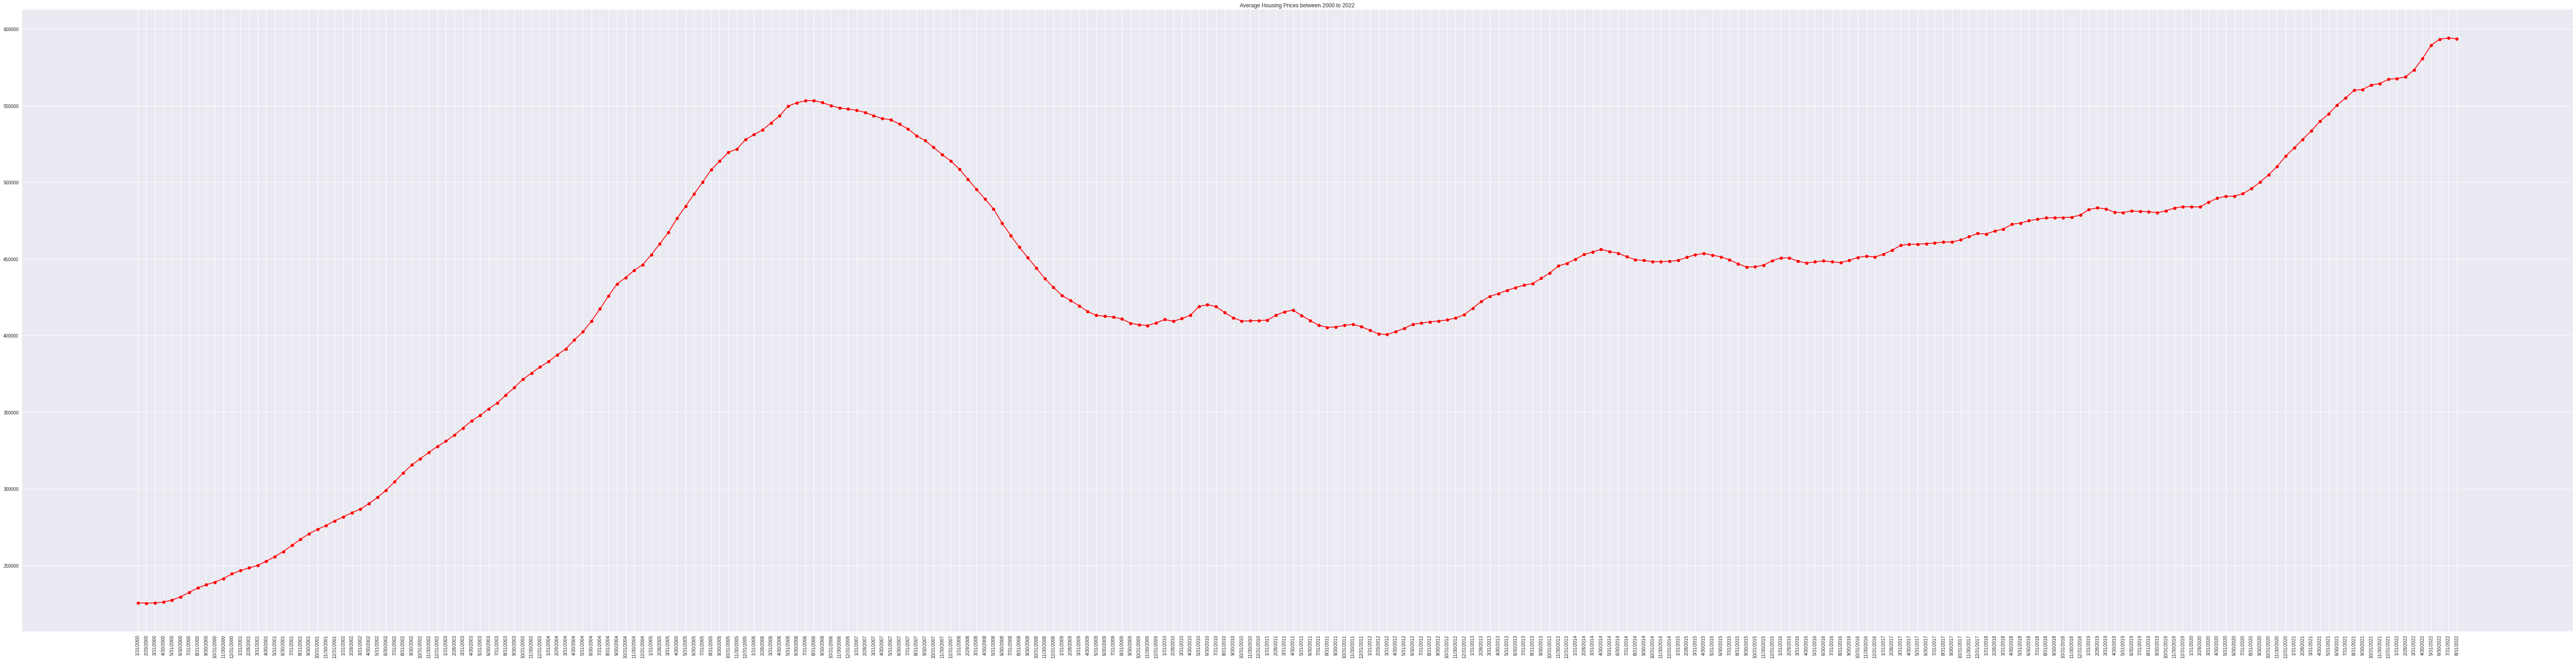

In [5]:
plt.figure(figsize=(100,25))
plt.style.use('seaborn')
plt.plot(x,y,color='red', marker='o')
plt.title("Average Housing Prices between 2000 to 2022")
plt.xticks(rotation=90)
plt.show()

--------------------

In [6]:
zip1 = pd.read_csv("/content/MC_house_price_zipcodes_1.csv")
print(zip1)

          Date   Z20812  Z20814   Z20815   Z20816   Z20817   Z20818  Z20832  \
0    1/31/2000   377559  299704   461954   462167   436400   445459  228736   
1    2/29/2000   376827  299918   462114   461790   436424   445754  228311   
2    3/31/2000   377763  300649   463183   462025   437376   447612  228252   
3    4/30/2000   380527  302214   465766   463686   439633   451079  228586   
4    5/31/2000   386945  304859   469820   467132   443569   455619  229856   
..         ...      ...     ...      ...      ...      ...      ...     ...   
267  4/30/2022  1223679  897048  1326862  1303126  1178474  1200311  597626   
268  5/31/2022  1257144  910984  1347907  1327386  1202615  1226953  607174   
269  6/30/2022  1274773  917943  1361984  1342169  1216783  1245689  610635   
270  7/31/2022  1279696  919604  1369161  1348020  1222567  1256595  611328   
271  8/31/2022  1269110  918137  1372809  1345705  1221643  1258220  610472   

     Z20833  Z20837  ...  Z20895  Z20896  Z20901  Z

In [7]:
columns = ['Z20812', 'Z20814', 'Z20815', 'Z20816', 'Z20817', 'Z20818', 'Z20832', 'Z20833', 'Z20837', 'Z20838', 'Z20839', 'Z20841', 'Z20842', 'Z20850', 'Z20851', 'Z20852', 'Z20853', 'Z20854', 'Z20855', 'Z20860', 'Z20861', 'Z20862', 'Z20866', 'Z20868', 'Z20871', 'Z20872', 'Z20874', 'Z20876', 'Z20877', 'Z20878', 'Z20879', 'Z20880', 'Z20882', 'Z20886', 'Z20895', 'Z20896', 'Z20901', 'Z20902', 'Z20903', 'Z20904', 'Z20905', 'Z20906', 'Z20910', 'Z20912']

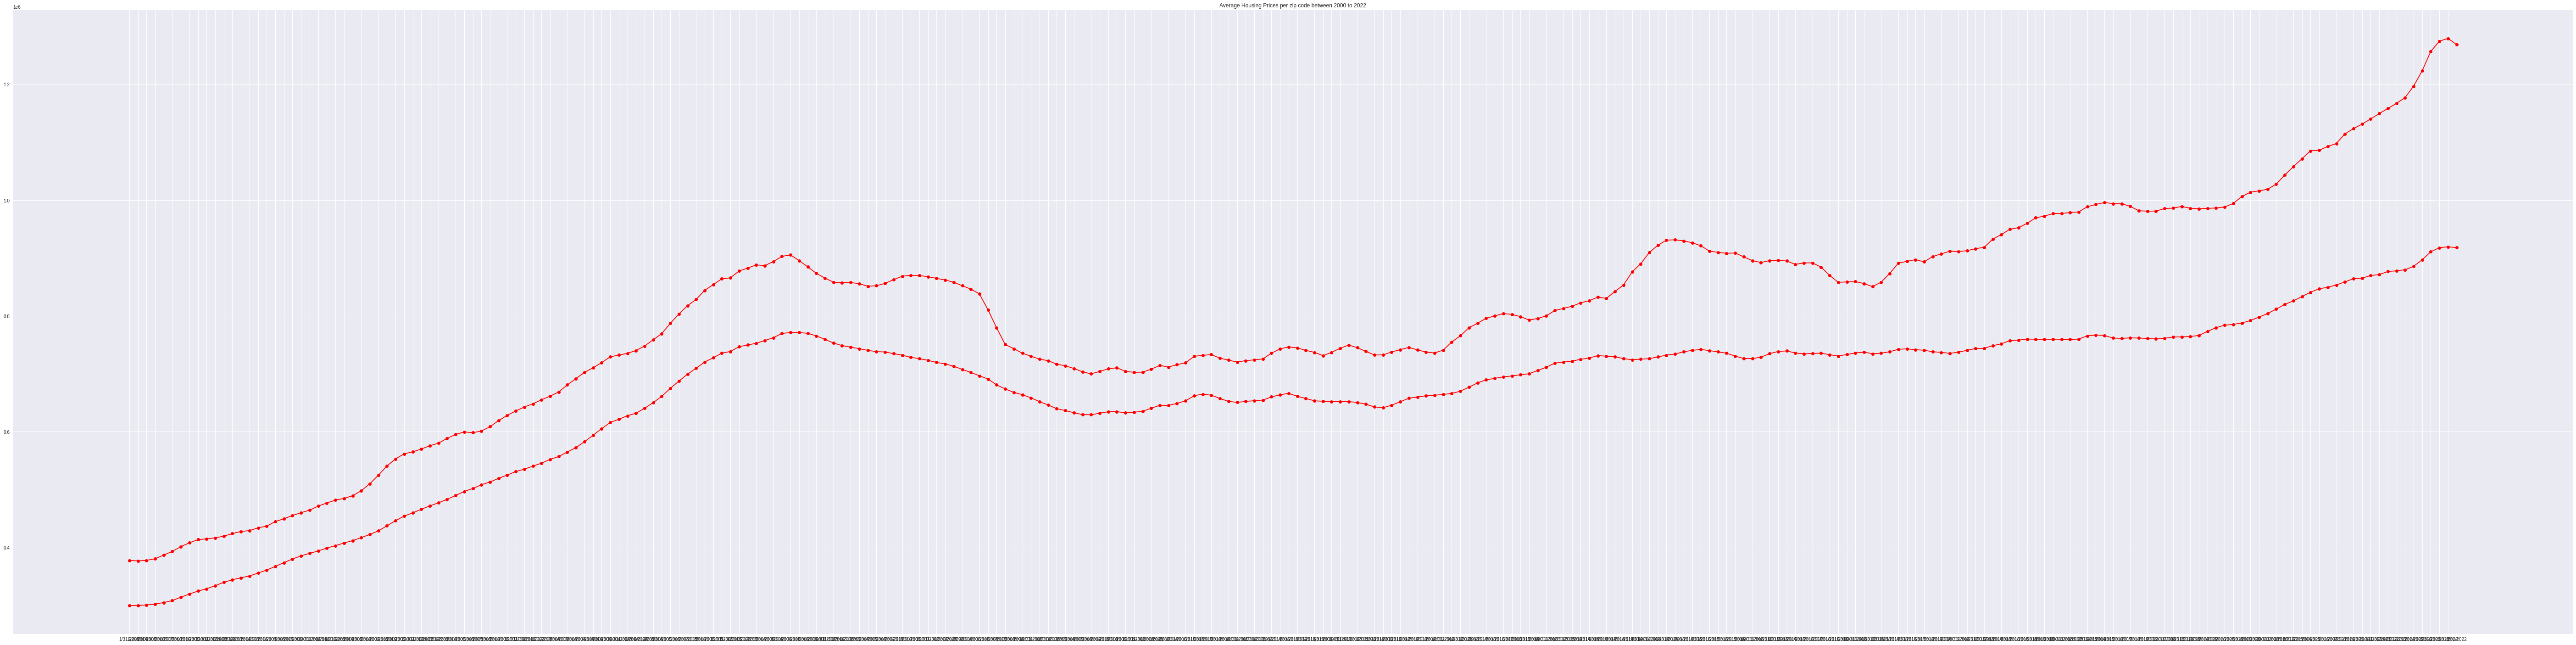

In [8]:
a = list(zip1['Date'])
b = list(zip1['Z20812'])
c = list(zip1['Z20814'])
zip11 = pd.read_csv("/content/MC_house_price_zipcodes_1.csv", usecols=columns)
plt.figure(figsize=(100,25))
plt.plot(a,b,c,color='red', marker='o')
plt.title("Average Housing Prices per zip code between 2000 to 2022")
plt.show()

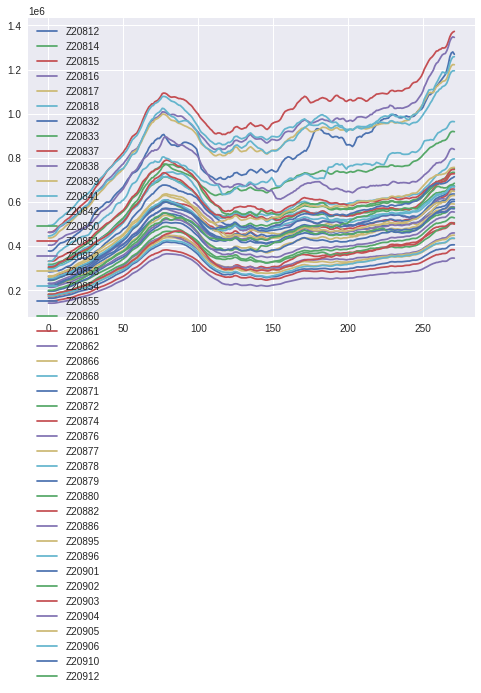

In [9]:
zip11.plot()

In [10]:
#plt.figure(figsize=(100,25))
#plt.style.use('seaborn')
#plt.plot(x,y, marker='o')
#plt.title("Average Housing Prices per zip code between 2000 to 2022 ")
#plt.xticks(rotation=90)
#plt.show()

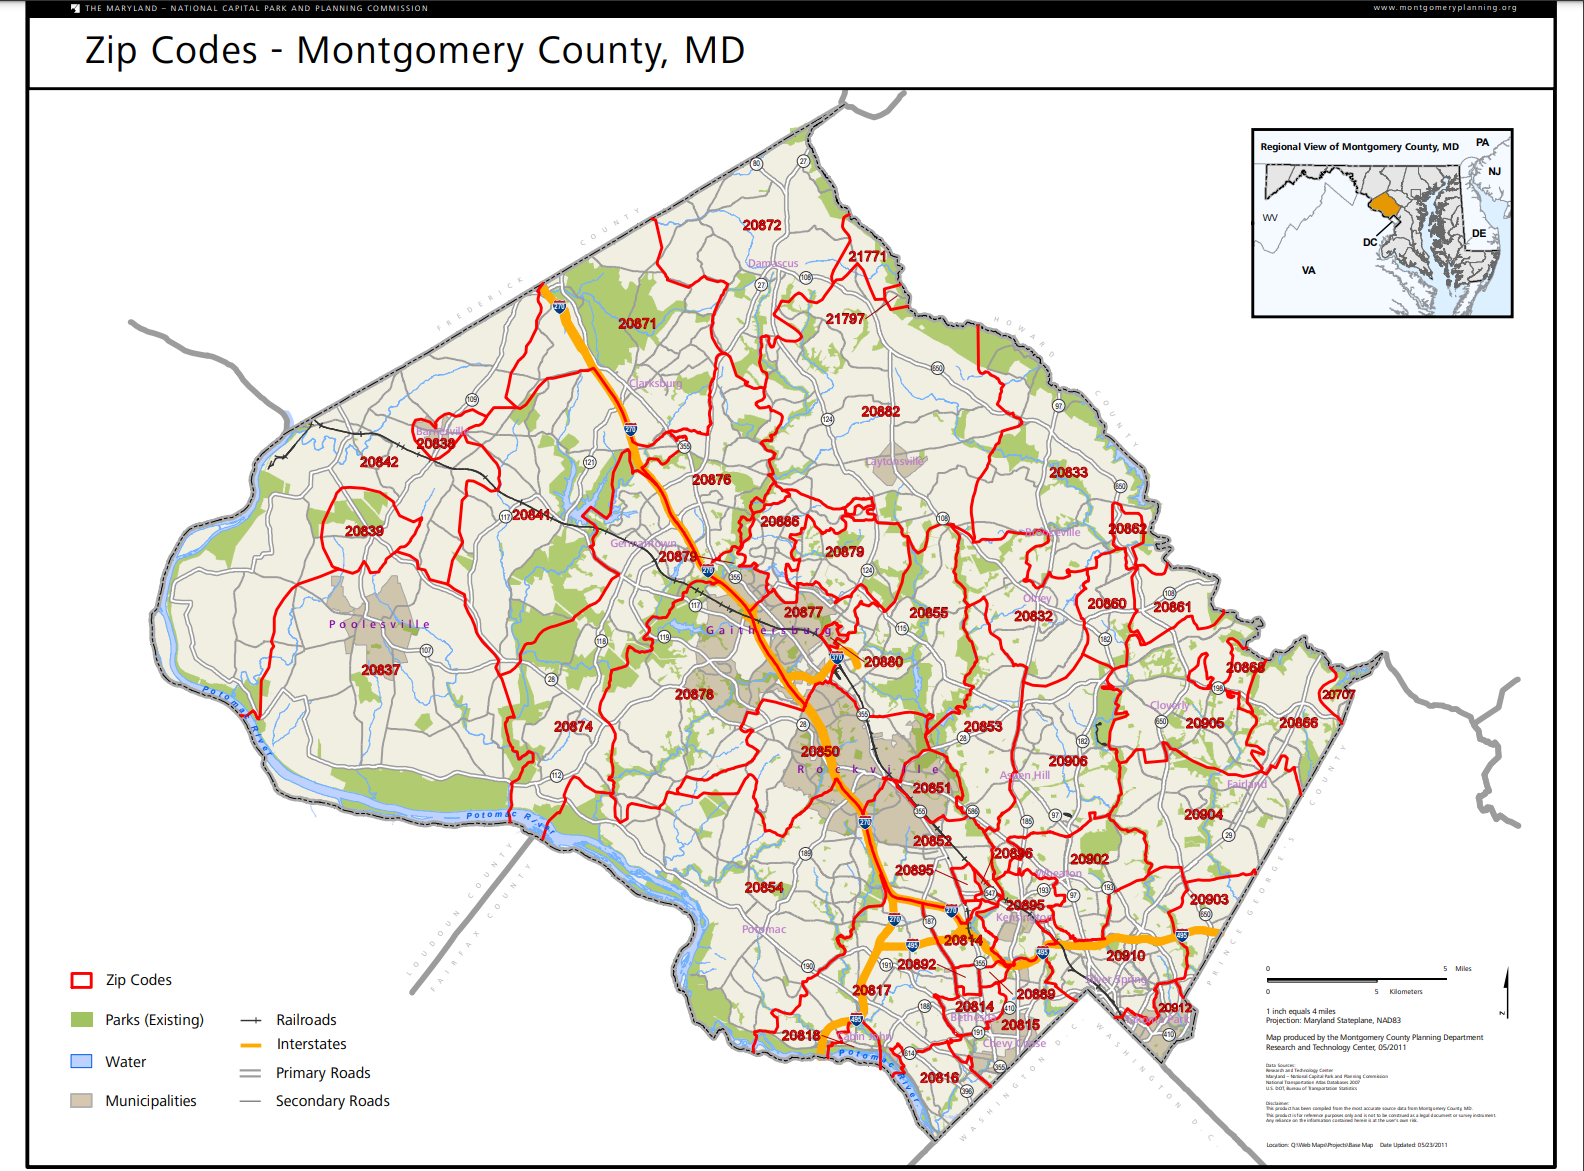

In [11]:
from IPython.display import Image
Image('/content/MC_zipcodes.png')

--------------------------------

In [12]:
inflation = pd.read_csv("/content/Inflation.csv")
print(inflation)

          Date  CPI(YoY)
0    1/31/2000       2.7
1    2/29/2000       3.2
2    3/31/2000       3.8
3    4/30/2000       3.1
4    5/31/2000       3.2
..         ...       ...
267  4/30/2022       8.3
268  5/31/2022       8.6
269  6/30/2022       9.1
270  7/31/2022       8.5
271  8/31/2022       8.3

[272 rows x 2 columns]


In [13]:
w = list(inflation['Date'])
v = list(inflation['CPI(YoY)'])

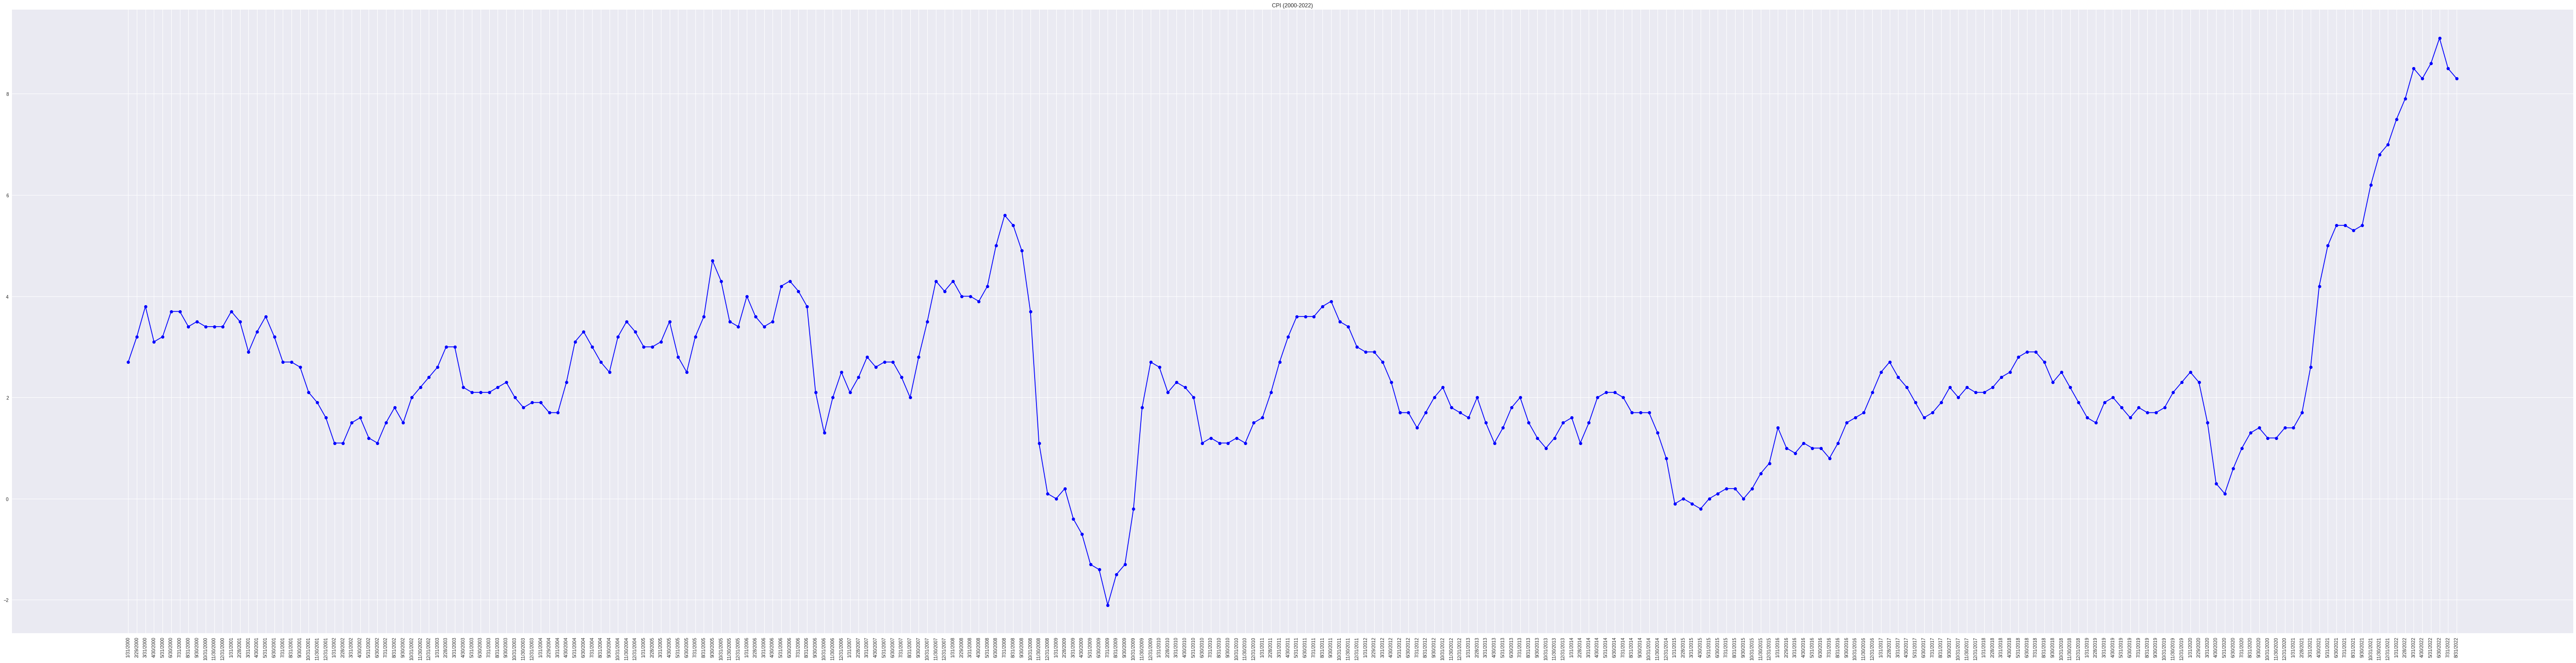

In [14]:
plt.figure(figsize=(100,25))
plt.style.use('seaborn')
plt.plot(w,v,color='blue', marker='o')
plt.title("CPI (2000-2022)")
plt.xticks(rotation=90)
plt.show()

---------------------

In [15]:
mort = pd.read_csv("/content/MORTGAGE30USnew.csv")
print(mort)

          Date  MORTGAGE30US
0    1/31/2000          8.25
1    2/29/2000          8.31
2    3/31/2000          8.23
3    4/30/2000          8.13
4    5/31/2000          8.62
..         ...           ...
267  4/30/2022          5.10
268  5/31/2022          5.10
269  6/30/2022          5.70
270  7/31/2022          5.30
271  8/31/2022          5.55

[272 rows x 2 columns]


In [16]:
s = list(mort['Date'])
t = list(mort['MORTGAGE30US'])

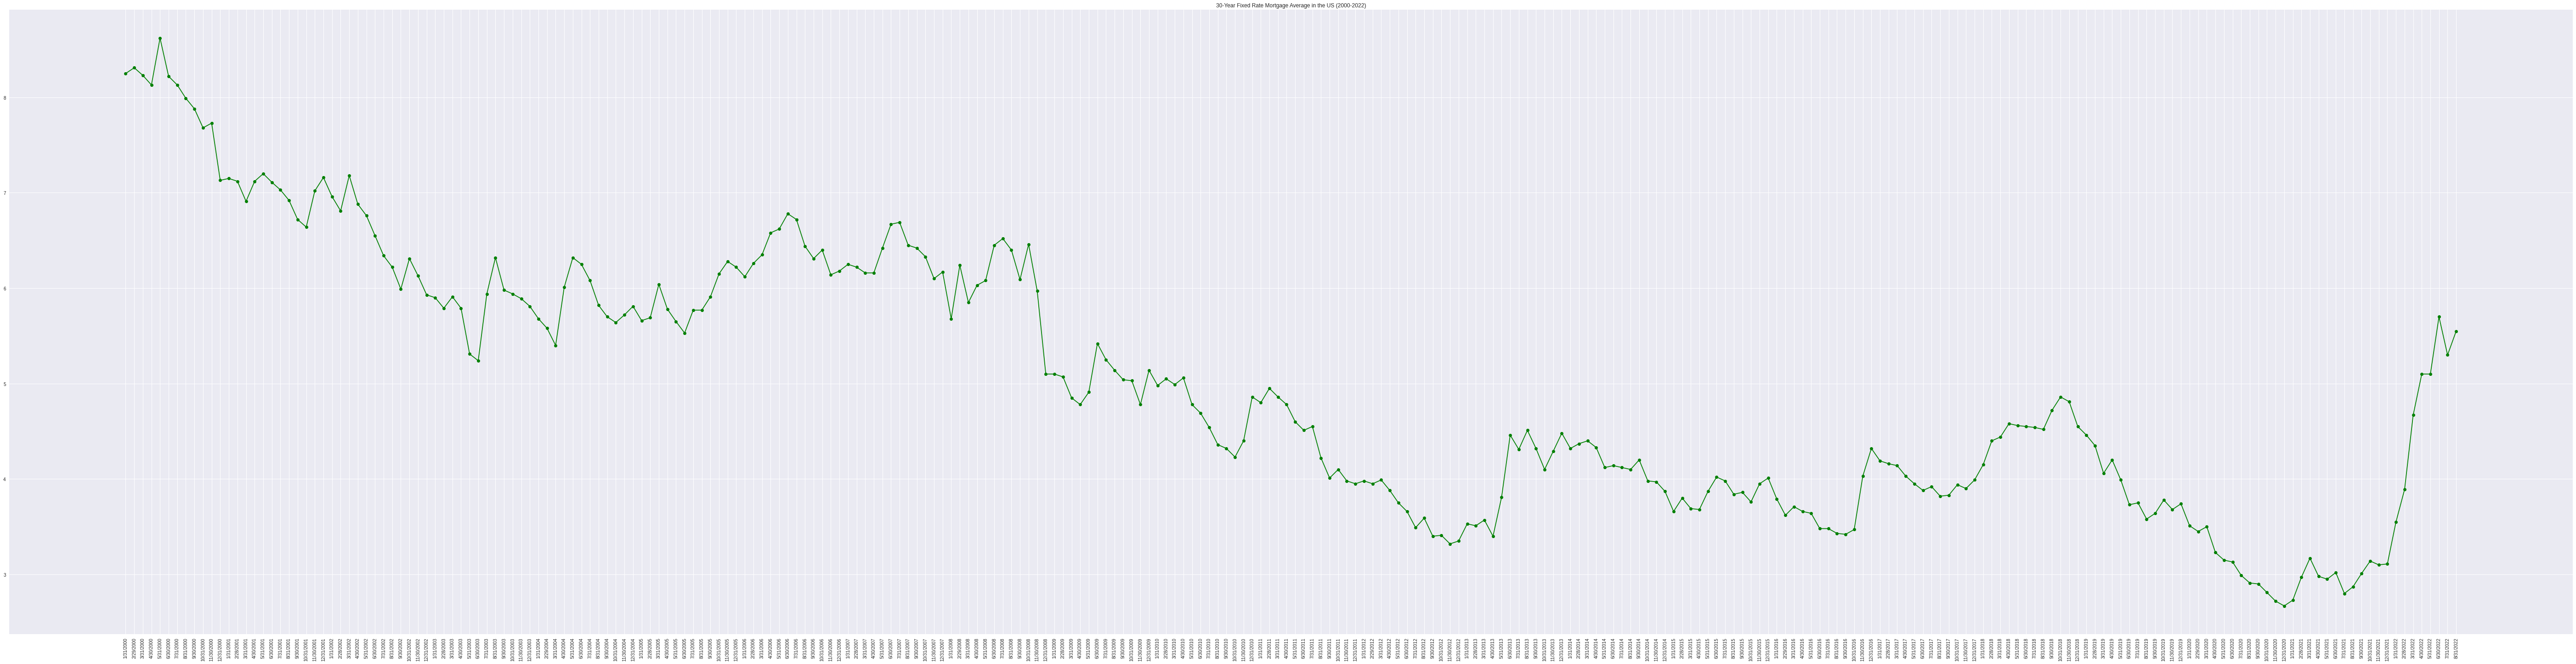

In [17]:
plt.figure(figsize=(100,25))
plt.style.use('seaborn')
plt.plot(s,t,color='green', marker='o')
plt.title("30-Year Fixed Rate Mortgage Average in the US (2000-2022)")
plt.xticks(rotation=90)
plt.show()

---------------------

In [18]:
unemployment = pd.read_csv("/content/UNRATE.csv")
print(unemployment)

         DATE  UNRATE
0    1/1/2000     4.0
1    2/1/2000     4.1
2    3/1/2000     4.0
3    4/1/2000     3.8
4    5/1/2000     4.0
..        ...     ...
268  5/1/2022     3.6
269  6/1/2022     3.6
270  7/1/2022     3.5
271  8/1/2022     3.7
272  9/1/2022     3.5

[273 rows x 2 columns]


In [19]:
p = list(unemployment['DATE'])
u = list(unemployment['UNRATE'])

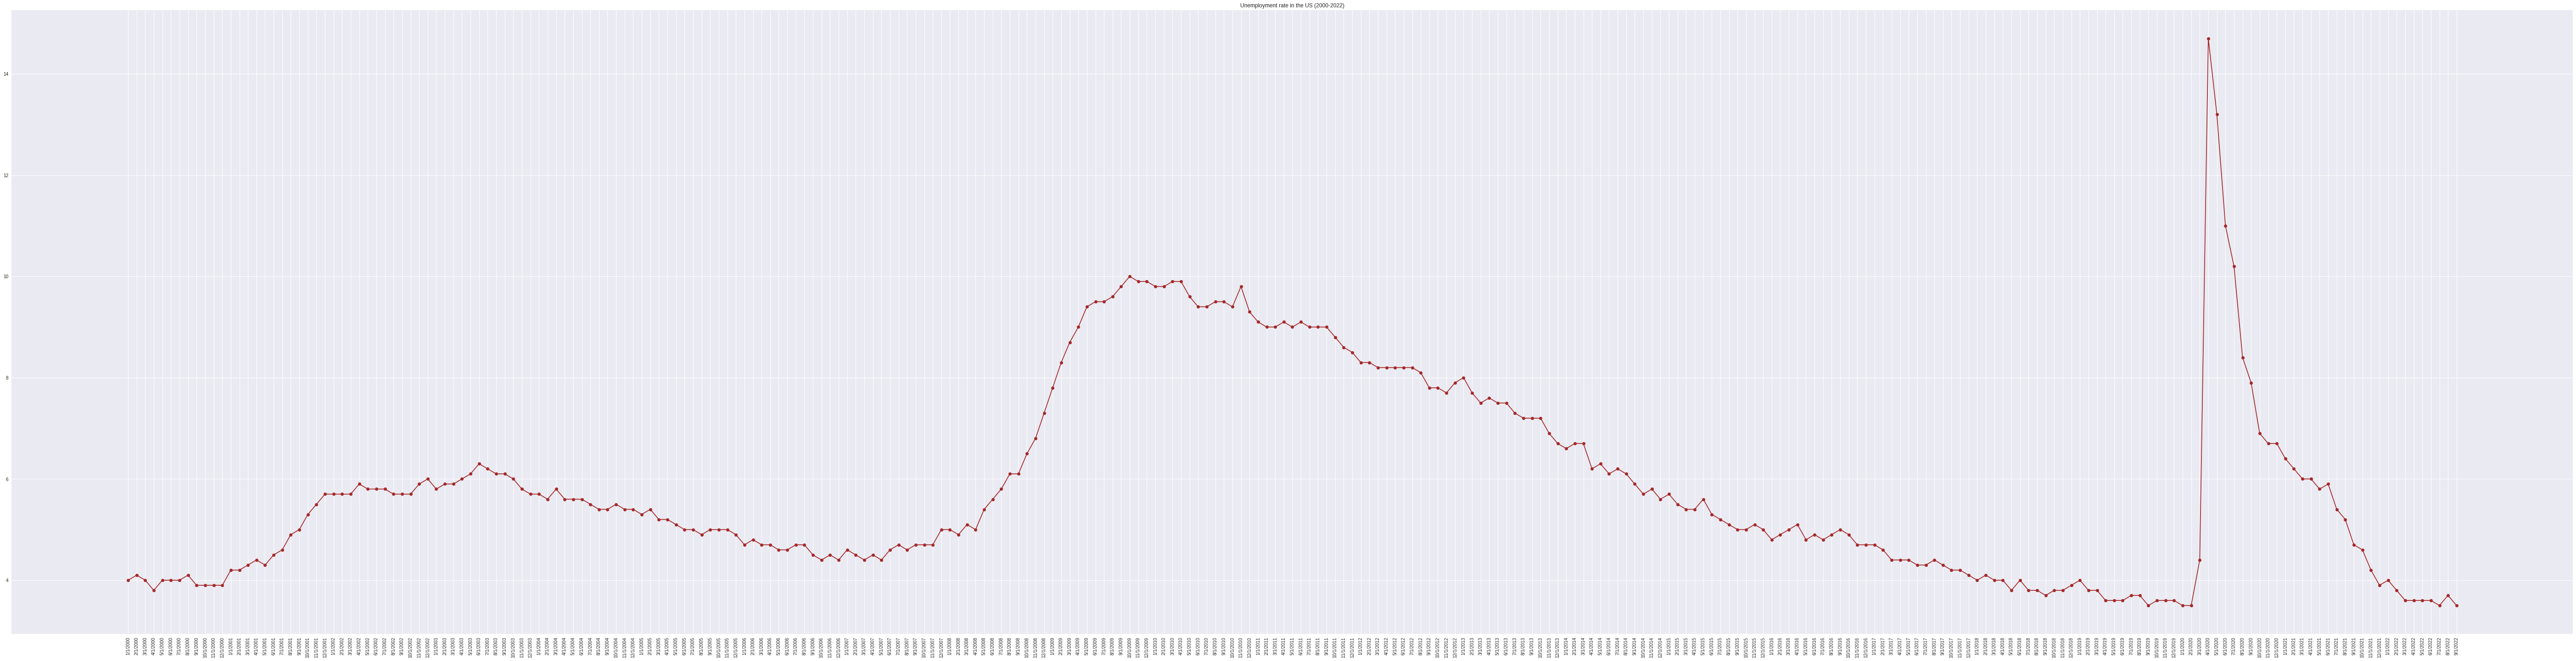

In [20]:
plt.figure(figsize=(100,25))
plt.style.use('seaborn')
plt.plot(p,u,color='brown', marker='o')
plt.title("Unemployment rate in the US (2000-2022)")
plt.xticks(rotation=90)
plt.show()

In [21]:
unemploymentmc = pd.read_csv("/content/MDMONT0URN.csv")
print(unemploymentmc)

         DATE  MDMONT0URN
0    1/1/2000         2.6
1    2/1/2000         2.6
2    3/1/2000         2.4
3    4/1/2000         2.2
4    5/1/2000         2.8
..        ...         ...
267  4/1/2022         3.0
268  5/1/2022         3.4
269  6/1/2022         4.4
270  7/1/2022         3.7
271  8/1/2022         3.9

[272 rows x 2 columns]


In [22]:
m = list(unemploymentmc['DATE'])
n = list(unemploymentmc['MDMONT0URN'])

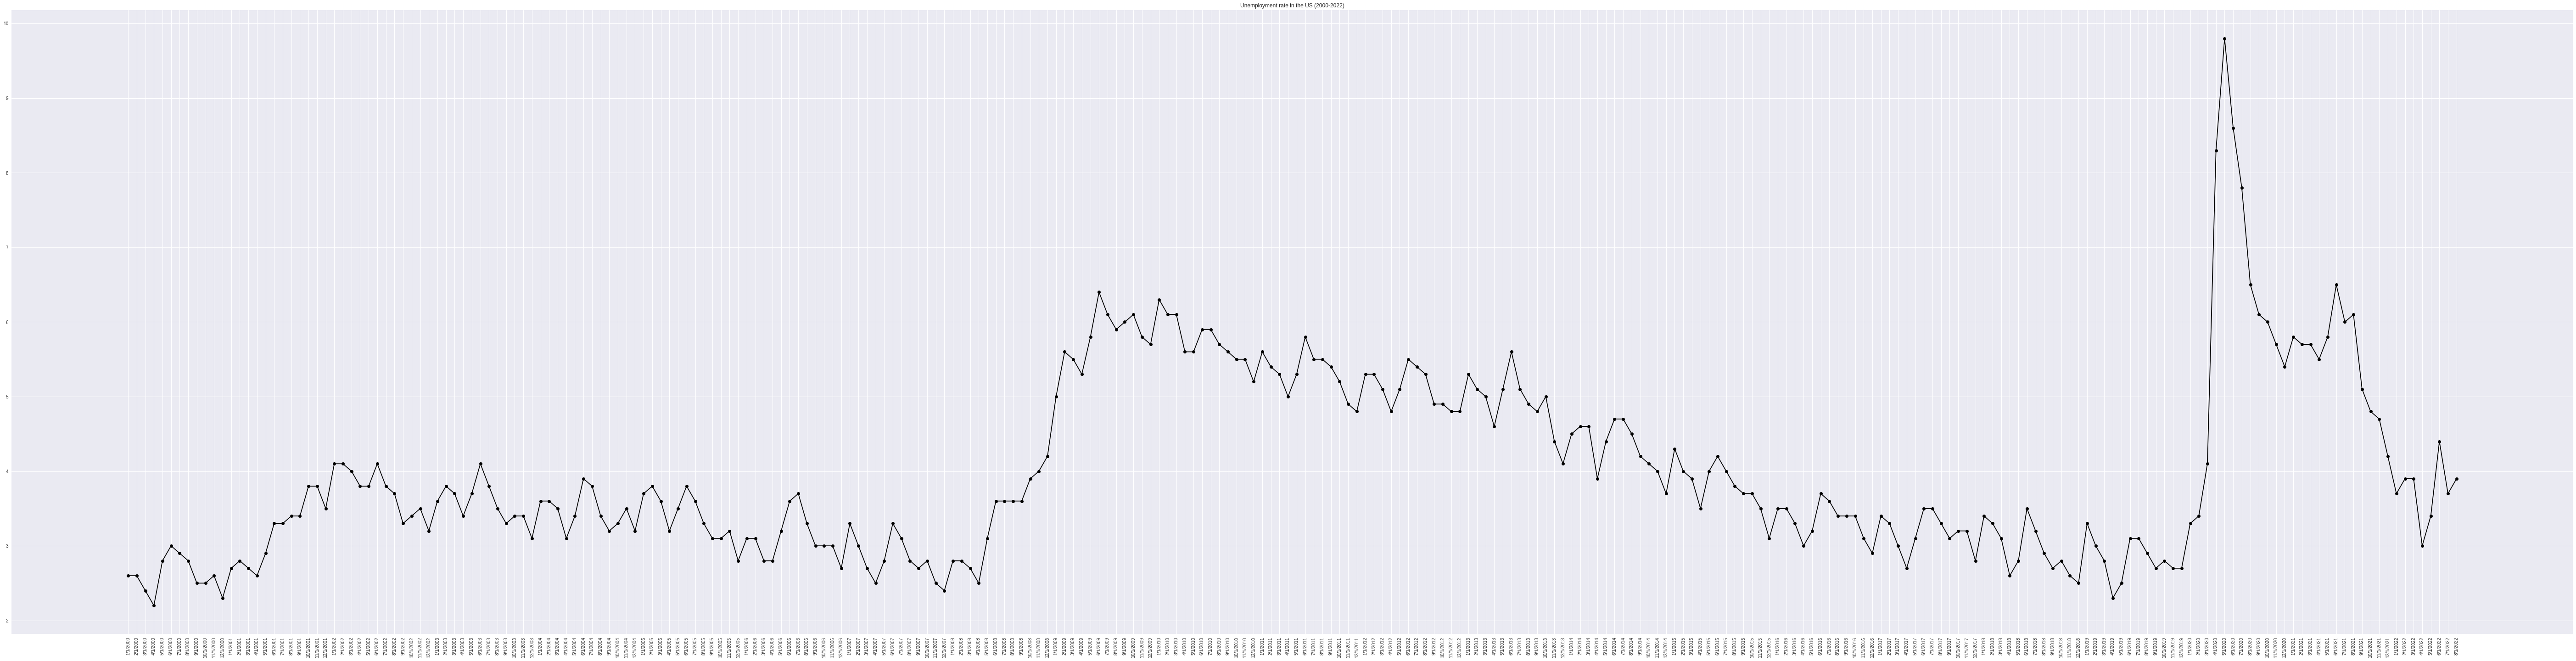

In [23]:
plt.figure(figsize=(100,25))
plt.style.use('seaborn')
plt.plot(m,n,color='black', marker='o')
plt.title("Unemployment rate in the US (2000-2022)")
plt.xticks(rotation=90)
plt.show()

------------------------------

# Correlation Matrix

In [24]:
#Loading dataset
reg = pd.read_csv("/content/reg_combined.csv")
print(reg)


          Date  Avg_County_Home_Price  CPI(YoY)  UNRATE  MDMONT0URN  \
0    1/31/2000                 225675       2.7     4.0         2.6   
1    2/29/2000                 225417       3.2     4.1         2.6   
2    3/31/2000                 225549       3.8     4.0         2.4   
3    4/30/2000                 226115       3.1     3.8         2.2   
4    5/31/2000                 227490       3.2     4.0         2.8   
..         ...                    ...       ...     ...         ...   
267  4/30/2022                 580802       8.3     3.6         3.0   
268  5/31/2022                 589406       8.6     3.6         3.4   
269  6/30/2022                 593318       9.1     3.6         4.4   
270  7/31/2022                 594065       8.5     3.5         3.7   
271  8/31/2022                 593521       8.3     3.7         3.9   

     MORTGAGE30US  
0            8.25  
1            8.31  
2            8.23  
3            8.13  
4            8.62  
..            ...  
267    

In [25]:
reg.corr()

,Avg_County_Home_Price,CPI(YoY),UNRATE,MDMONT0URN,MORTGAGE30US
Avg_County_Home_Price,1.000000,0.269529,-0.116329,0.093675,-0.499492
CPI(YoY),0.269529,1.000000,-0.393569,-0.251002,0.223786
UNRATE,-0.116329,-0.393569,1.000000,0.868894,-0.276034
MDMONT0URN,0.093675,-0.251002,0.868894,1.000000,-0.498389
MORTGAGE30US,-0.499492,0.223786,-0.276034,-0.498389,1.000000


In [26]:
df = pd.DataFrame(reg)

corr_matrix = df.corr()
print(corr_matrix)

                       Avg_County_Home_Price  CPI(YoY)    UNRATE  MDMONT0URN  \
Avg_County_Home_Price               1.000000  0.269529 -0.116329    0.093675   
CPI(YoY)                            0.269529  1.000000 -0.393569   -0.251002   
UNRATE                             -0.116329 -0.393569  1.000000    0.868894   
MDMONT0URN                          0.093675 -0.251002  0.868894    1.000000   
MORTGAGE30US                       -0.499492  0.223786 -0.276034   -0.498389   

                       MORTGAGE30US  
Avg_County_Home_Price     -0.499492  
CPI(YoY)                   0.223786  
UNRATE                    -0.276034  
MDMONT0URN                -0.498389  
MORTGAGE30US               1.000000  


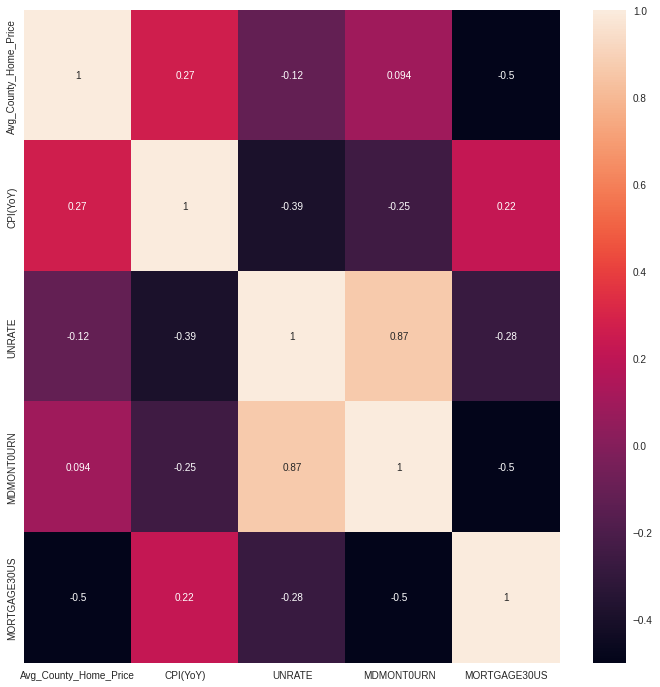

In [27]:
#plotting the heatmap for correlation
fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(df.corr(), annot=True)

--------------------------------

# Feature Importance

In [28]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   272 non-null    object 
 1   Avg_County_Home_Price  272 non-null    int64  
 2   CPI(YoY)               272 non-null    float64
 3   UNRATE                 272 non-null    float64
 4   MDMONT0URN             272 non-null    float64
 5   MORTGAGE30US           272 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 12.9+ KB


In [29]:
#reg['Date'] = pd.to_datetime(reg['Date'])
#reg.info()

In [30]:
dfa = df.drop('Date', axis=1)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = dfa.drop('Avg_County_Home_Price', axis=1)
y = dfa['Avg_County_Home_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

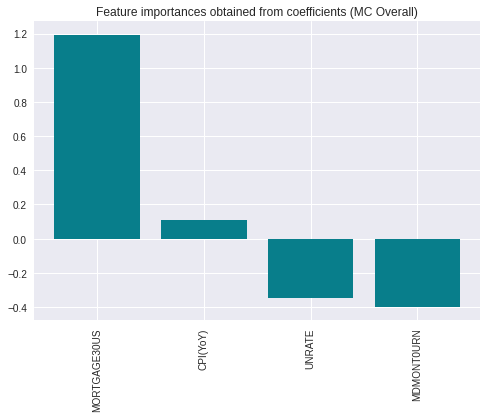

In [33]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients (MC Overall)', size=12)
plt.xticks(rotation='vertical')
plt.show()

----------------------------------

# Zip Code Analysis

I will take a look at 3 zip codes in urban areas and 3 zip codes in rural areas.

## Urban Zip Codes

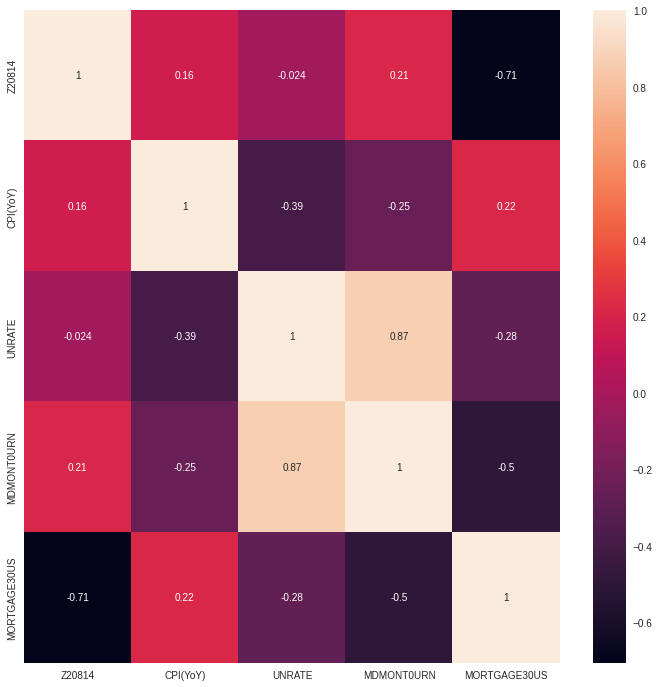

In [34]:
reg20814 = pd.read_csv("/content/reg_20814.csv")
corr_matrix = reg20814.corr()

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(reg20814.corr(), annot=True)

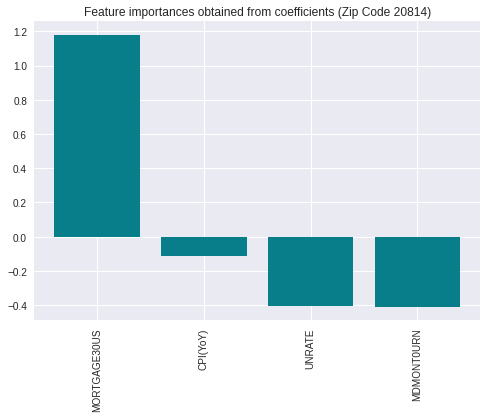

In [35]:
reg20814a = reg20814.drop('Date', axis=1)

X = reg20814a.drop('Z20814', axis=1)
y = reg20814a['Z20814']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients (Zip Code 20814)', size=12)
plt.xticks(rotation='vertical')
plt.show()

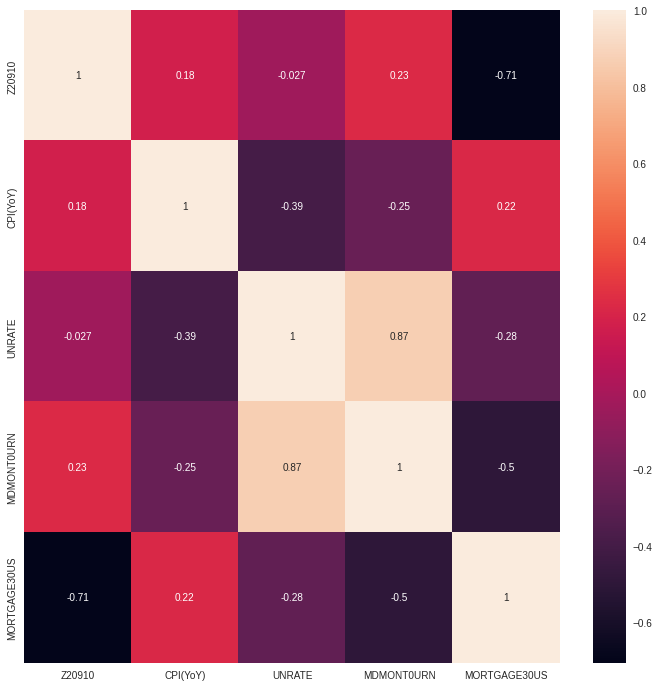

In [36]:
reg20910 = pd.read_csv("/content/reg_20910.csv")
corr_matrix = reg20910.corr()

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(reg20910.corr(), annot=True)

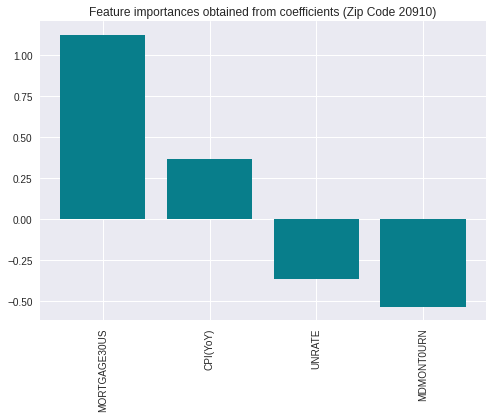

In [37]:
reg20910a = reg20910.drop('Date', axis=1)

X = reg20910a.drop('Z20910', axis=1)
y = reg20910a['Z20910']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients (Zip Code 20910)', size=12)
plt.xticks(rotation='vertical')
plt.show()

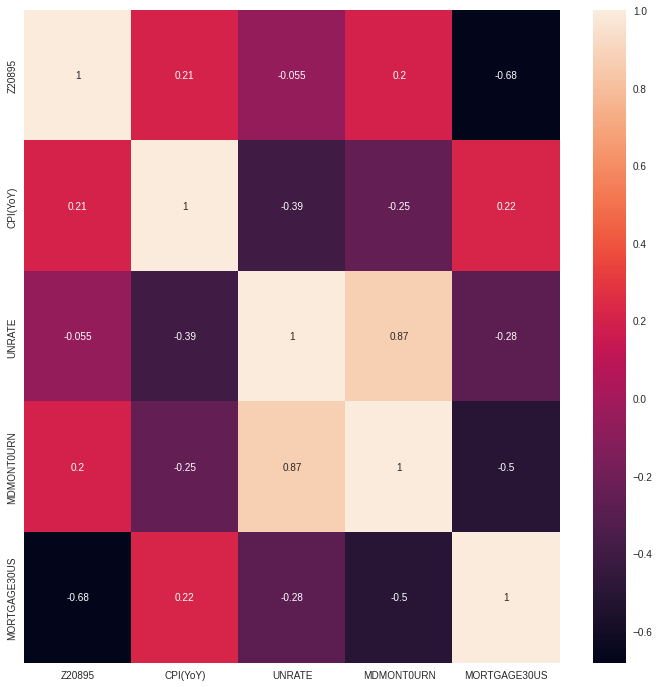

In [38]:
reg20895 = pd.read_csv("/content/reg_20895.csv")
corr_matrix = reg20895.corr()

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(reg20895.corr(), annot=True)

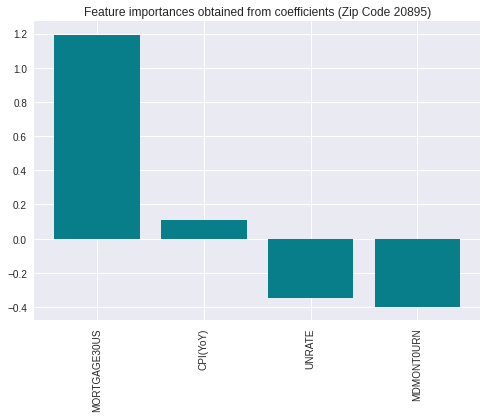

In [39]:
reg20895a = reg20895.drop('Date', axis=1)

X = reg20895a.drop('Z20895', axis=1)
y = reg20895a['Z20895']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients (Zip Code 20895)', size=12)
plt.xticks(rotation='vertical')
plt.show()

## Rural Zip Codes

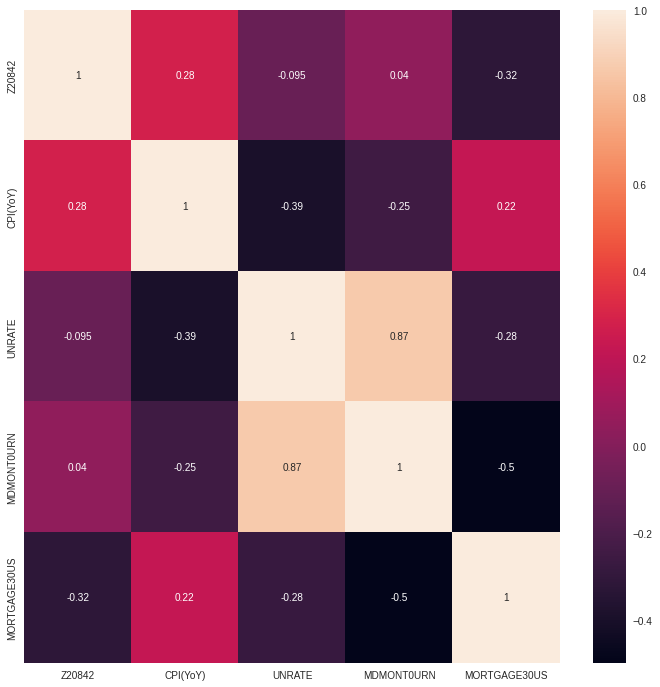

In [40]:
reg20842 = pd.read_csv("/content/reg_20842.csv")
corr_matrix = reg20842.corr()

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(reg20842.corr(), annot=True)

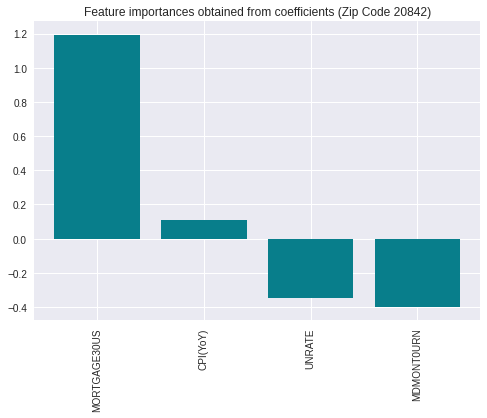

In [41]:
reg20842a = reg20842.drop('Date', axis=1)

X = reg20842a.drop('Z20842', axis=1)
y = reg20842a['Z20842']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients (Zip Code 20842)', size=12)
plt.xticks(rotation='vertical')
plt.show()

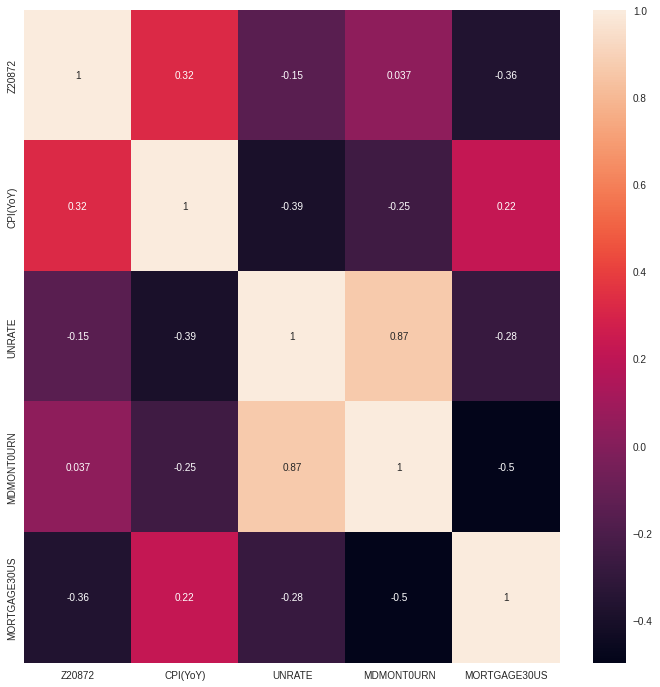

In [42]:
reg20872 = pd.read_csv("/content/reg_20872.csv")
corr_matrix = reg20872.corr()

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(reg20872.corr(), annot=True)

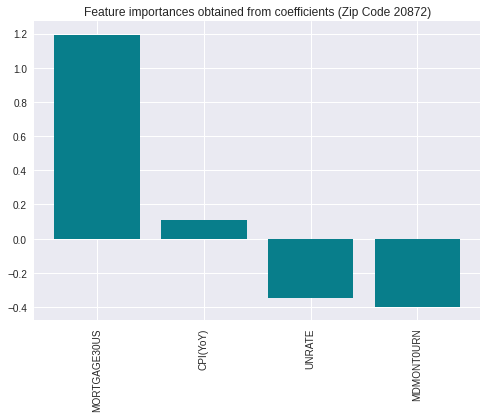

In [43]:
reg20872a = reg20872.drop('Date', axis=1)

X = reg20872a.drop('Z20872', axis=1)
y = reg20872a['Z20872']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients (Zip Code 20872)', size=12)
plt.xticks(rotation='vertical')
plt.show()

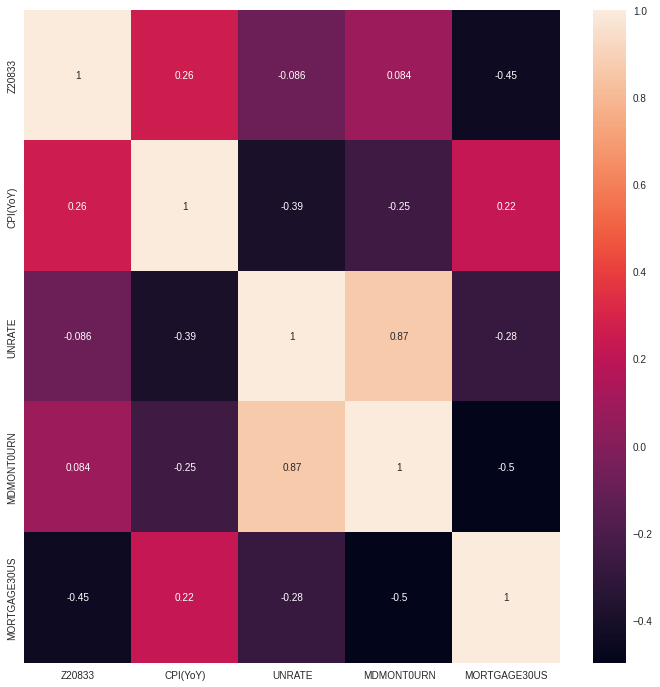

In [44]:
reg20833 = pd.read_csv("/content/reg_20833.csv")
corr_matrix = reg20833.corr()

fig, ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(reg20833.corr(), annot=True)

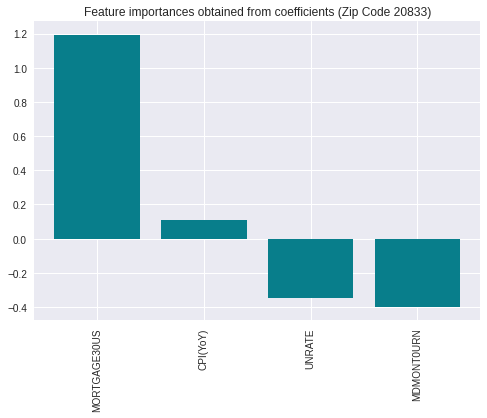

In [45]:
reg20833a = reg20833.drop('Date', axis=1)

X = reg20833a.drop('Z20833', axis=1)
y = reg20833a['Z20833']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients (Zip Code 20833)', size=12)
plt.xticks(rotation='vertical')
plt.show()

---------------------------------

# VAR Regression

In [46]:
df['Date'] = df['Date'].str.replace('/', '').astype(float)

In [47]:
print(df.head())
print(df.info())

        Date  Avg_County_Home_Price  CPI(YoY)  UNRATE  MDMONT0URN  \
0  1312000.0                 225675       2.7     4.0         2.6   
1  2292000.0                 225417       3.2     4.1         2.6   
2  3312000.0                 225549       3.8     4.0         2.4   
3  4302000.0                 226115       3.1     3.8         2.2   
4  5312000.0                 227490       3.2     4.0         2.8   

   MORTGAGE30US  
0          8.25  
1          8.31  
2          8.23  
3          8.13  
4          8.62  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   272 non-null    float64
 1   Avg_County_Home_Price  272 non-null    int64  
 2   CPI(YoY)               272 non-null    float64
 3   UNRATE                 272 non-null    float64
 4   MDMONT0URN             272 non-null    float64
 5   MORT

In [48]:
df.describe()

,Date,Avg_County_Home_Price,CPI(YoY),UNRATE,MDMONT0URN,MORTGAGE30US
count,2.720000e+02,272.000000,272.000000,272.000000,272.000000,272.000000
mean,6.747562e+06,436074.169118,2.425368,5.890809,4.002574,4.992096
std,3.448550e+06,85091.151832,1.708882,1.954338,1.219776,1.356730
min,1.312000e+06,225417.000000,-2.100000,3.500000,2.200000,2.670000
25%,3.312022e+06,408049.500000,1.500000,4.475000,3.100000,3.887500
50%,6.302020e+06,448774.000000,2.100000,5.400000,3.600000,4.780000
75%,9.302019e+06,483877.000000,3.200000,6.725000,4.900000,6.105000
max,1.231202e+07,594065.000000,9.100000,14.700000,9.800000,8.620000


In [49]:
train = df[:int(0.8*(len(df)))]
valid = df[int(0.8*(len(df))):]

In [50]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [51]:

# Fit the model
model = VAR(endog=train)
model_fit = model.fit()

# Make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)

  obj = getattr(results, attr)



In [52]:
# Convert array to DataFrame
cols = df.columns
pred = pd.DataFrame(index=range(0, len(prediction)), columns=[cols])

for j in range(0, len(cols)):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

In [53]:
# RMSE
cols = df.columns
for i in cols:
    print('RMSE value for', i, 'is:', sqrt(mean_squared_error(pred[i], valid[i])))

RMSE value for Date is: 3302249.8699088776
RMSE value for Avg_County_Home_Price is: 28705.094255754717
RMSE value for CPI(YoY) is: 2.6532774157297734
RMSE value for UNRATE is: 3.1722495146784886
RMSE value for MDMONT0URN is: 2.6646372270705307
RMSE value for MORTGAGE30US is: 1.5720377939951211


In [54]:
# Make final predictions
model = VAR(endog=df)
model_fit = model.fit()

yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/statsmodels/base/wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)

  obj = getattr(results, attr)



[[8.35735354e+06 5.96176564e+05 8.32199061e+00 3.56089318e+00
  3.67322937e+00 5.62436024e+00]]


# Check for Seasonality & Preprocessing

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import torch

In [56]:
def plot_decompose(decompose_result):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(12,20))
    decompose_result.observed.plot(legend=False,ax=ax1,fontsize = 20,grid=True,linewidth = 3)
    ax1.set_ylabel("Observed",fontsize = 20)
    decompose_result.trend.plot(legend=False,ax=ax2,fontsize = 20,grid=True,linewidth = 3)
    ax2.set_ylabel("Trend",fontsize = 20)
    decompose_result.seasonal.plot(legend=False,ax=ax3,fontsize = 20,grid=True,linewidth = 3)
    ax3.set_ylabel("Seasonal",fontsize = 20)
    decompose_result.resid.plot(legend=False,ax=ax4,fontsize = 20,grid=True,linewidth = 3)
    ax4.set_ylabel("Residual",fontsize = 20)

In [57]:
dfh = pd.read_csv("/content/reg_house.csv")
print(dfh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   272 non-null    object
 1   Avg_County_Home_Price  272 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.4+ KB
None


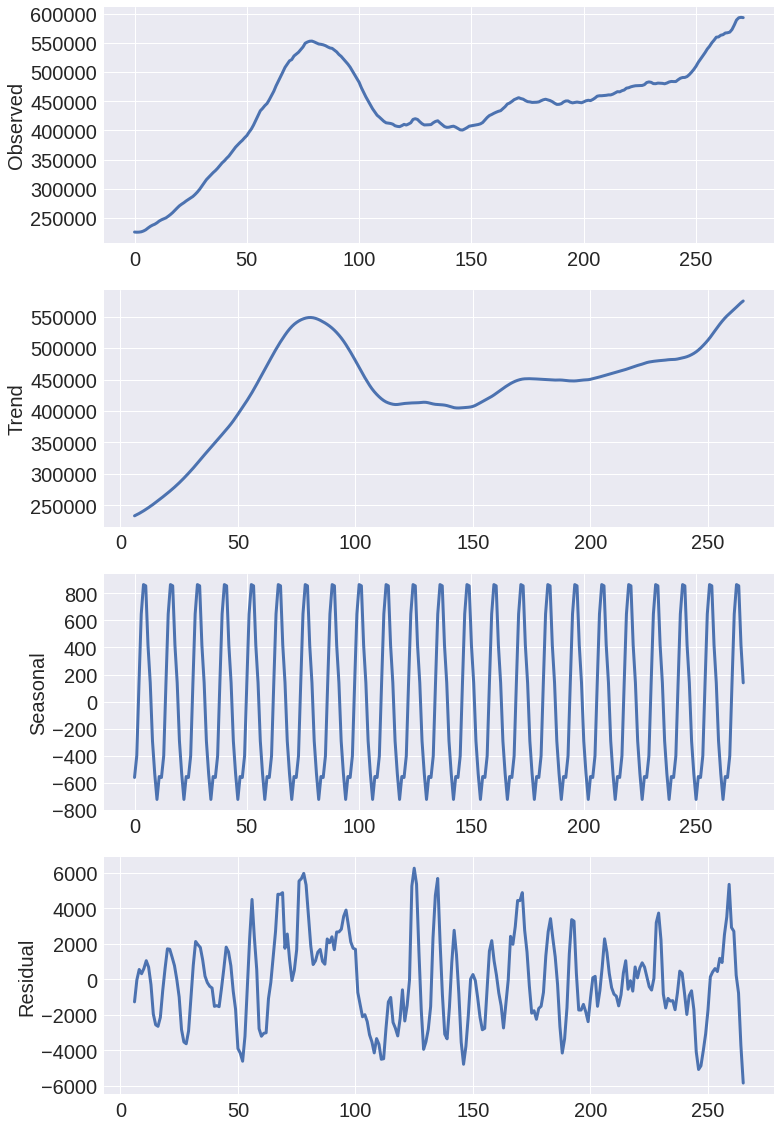

In [58]:
decomposition = seasonal_decompose(dfh['Avg_County_Home_Price'], period=12) 
plot_decompose(decomposition)

# Neural Prophet

In [59]:
pip install neuralprophet[live]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
dfh.rename(columns={"Date": "ds", "Avg_County_Home_Price": "y"}, inplace=True)

In [65]:
model = NeuralProphet()

metrics = model.fit(dfh, freq="D")
future = model.make_future_dataframe(dfh, periods=365, n_historic_predictions=len(dfh))
forecast = model.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 91.176% of the data.
INFO:NP.df_utils:Major frequency M corresponds to 91.176% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch)

Finding best initial lr:   0%|          | 0/214 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to 91.176% of the data.
INFO:NP.df_utils:Major frequency M corresponds to 91.176% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency D is different than major frequency M
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 57.3% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 57.3% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq D. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 57.3% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 57.3% of the data.
WARNING - (NP.df_utils._infer_frequency) - D

Predicting: 17it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


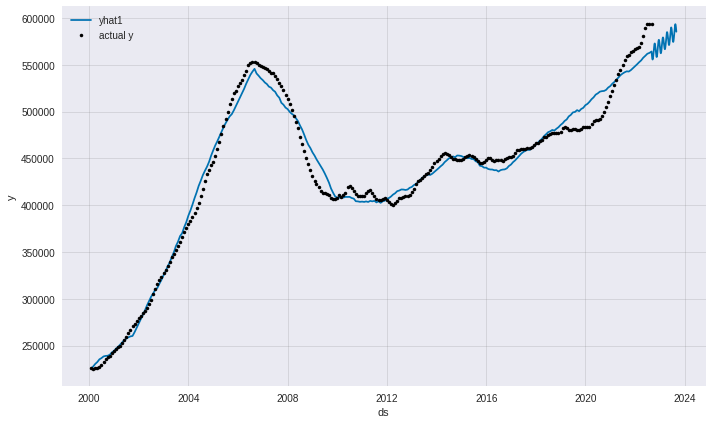

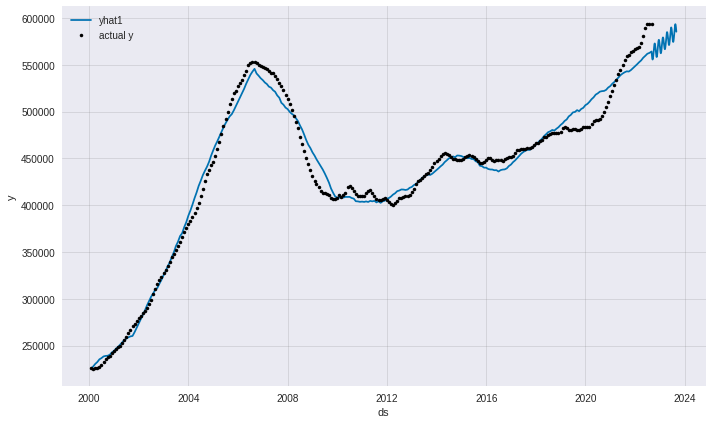

In [66]:
model.plot(forecast)
